In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import os
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.dates as mpl_dates
import matplotlib as mpl

In [26]:
### Import Data ###
file_paths = [
    'C:/Users/HangNTT192/Desktop/Python/202206-202211.xlsx',
    'C:/Users/HangNTT192/Desktop/Python/202212-202306.xlsx'
]

In [27]:
data_frames = [
    pd.read_excel(file_path, sheet_name=sheet_name)
    for file_path in file_paths
    for sheet_name in pd.ExcelFile(file_path).sheet_names[:-1]
]
data = pd.concat(data_frames, ignore_index=True)

In [28]:
### Data Preprocessing ###
data.dropna(inplace=True)
data['SAGYO_UNYO_DATE'] = pd.to_datetime(data['SAGYO_UNYO_DATE'], format='%Y%m%d')
data['SGY_TM'] = pd.to_datetime(data['SGY_TM'], format='%Y/%m/%d %H:%M:%S')

In [29]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Define time stamp
TIME_STAMP_COMPARING = {
    'prev_day': {'days': 1},
    'prev_week': {'weeks': 1},
    'prev_month': {'months': 1},
    'prev_quarter': {'months': 3},
    'prev_year': {'years': 1}
}

def get_time_stamp(run_date, time_stamp_comparing_with):
    if time_stamp_comparing_with in TIME_STAMP_COMPARING:
        delta = relativedelta(**TIME_STAMP_COMPARING[time_stamp_comparing_with])
        return run_date - delta
    else:
        raise ValueError('Invalid time stamp')

def logistic_comparison_by_filters(logistic_df, input_date, time_stamp_comparing_with, time_stamp, categories, focus, caculation_method):
    result = {}
    history_day = get_time_stamp(input_date, time_stamp_comparing_with)
    hist_filter = (logistic_df[time_stamp] == history_day)
    curr_filter = (logistic_df[time_stamp] == input_date)

    for category in categories:
        history_total = logistic_df[hist_filter].groupby([category], as_index=False)[focus].agg(caculation_method)
        current_total = logistic_df[curr_filter].groupby([category], as_index=False)[focus].agg(caculation_method)
        
        df = pd.merge(current_total, history_total, on=[category], suffixes=('_hist', '_curr'))
        df[focus + '_CHANGE_AMOUNT'] = df[focus + '_curr'] - df[focus + '_hist']
        df[focus + '_CHANGE(%)'] = (df[focus + '_CHANGE_AMOUNT'] / df[focus + '_curr']) * 100
        df[focus + '_CHANGE(%)'] = df[focus + '_CHANGE(%)'].round(2)

        df = df.sort_values(focus + '_CHANGE_AMOUNT')
        df_neg = df.query(f'`{focus + "_CHANGE_AMOUNT"}` < 0')
        most_likely_causes = df_neg.nsmallest(5, focus + '_CHANGE_AMOUNT')
        most_likely_causes['CATEGORY'] = category
        most_likely_causes.rename(columns={category: 'TITLE'}, inplace=True)
        result[category] = most_likely_causes
        output_filename = f"output/{category}_{input_date.strftime('%Y-%m-%d')}.csv"
        most_likely_causes.to_csv(output_filename, index=False)
        
    return result

# Parameter Passing
input_date = datetime(2023, 4, 15)
caculation_method = 'sum'  # Change to 'avg' if you need average calculation
time_stamp_comparing_with = 'prev_month'
time_stamp = 'SAGYO_UNYO_DATE'
categories = ['NIOKURI_NM', 'NIUKE_NM', 'CATE']
focus = 'SGY_JSK_QTY'

top5_by_each_category = logistic_comparison_by_filters(logistic_df = data, input_date = input_date, time_stamp_comparing_with = time_stamp_comparing_with, time_stamp = time_stamp, categories = categories, focus = focus, caculation_method = caculation_method)


In [30]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Define time stamp
TIME_STAMP_COMPARING = {
    'prev_day': {'days': 1},
    'prev_week': {'weeks': 1},
    'prev_month': {'months': 1},
    'prev_quarter': {'months': 3},
    'prev_year': {'years': 1}
}

def get_time_stamp(run_date, time_stamp_comparing_with):
    if time_stamp_comparing_with in TIME_STAMP_COMPARING:
        delta = relativedelta(**TIME_STAMP_COMPARING[time_stamp_comparing_with])
        return run_date - delta
    else:
        raise ValueError('Invalid time stamp')

def logistic_comparison_by_filters(logistic_df, input_date, time_stamp_comparing_with, time_stamp, categories, focus, caculation_method):
    result = {}
    history_day = get_time_stamp(input_date, time_stamp_comparing_with)
    hist_filter = (logistic_df[time_stamp] == history_day)
    curr_filter = (logistic_df[time_stamp] == input_date)

    for category in categories:
        history_total = logistic_df[hist_filter].groupby([category], as_index=False)[focus].agg(caculation_method)
        current_total = logistic_df[curr_filter].groupby([category], as_index=False)[focus].agg(caculation_method)
        
        df = pd.merge(current_total, history_total, on=[category], suffixes=('_hist', '_curr'))
        df[focus + '_CHANGE_AMOUNT'] = df[focus + '_curr'] - df[focus + '_hist']
        df[focus + '_CHANGE(%)'] = (df[focus + '_CHANGE_AMOUNT'] / df[focus + '_curr']) * 100
        df[focus + '_CHANGE(%)'] = df[focus + '_CHANGE(%)'].round(2)

        df = df.sort_values(focus + '_CHANGE_AMOUNT')
        df_neg = df.query(f'`{focus + "_CHANGE_AMOUNT"}` < 0')
        most_likely_causes = df_neg.nsmallest(5, focus + '_CHANGE_AMOUNT')
        most_likely_causes['CATEGORY'] = category
        most_likely_causes.rename(columns={category: 'TITLE'}, inplace=True)
        result[category] = most_likely_causes
        output_filename = f"output/{category}_{input_date.strftime('%Y-%m-%d')}.csv"
        most_likely_causes.to_csv(output_filename, index=False)
        
    return result

# Parameter Passing
input_date = datetime(2023, 4, 15)
caculation_method = 'sum'  # Change to 'avg' if you need average calculation
time_stamp_comparing_with = 'prev_month'
time_stamp = 'SAGYO_UNYO_DATE'
categories = ['NIOKURI_NM', 'NIUKE_NM', 'CATE']
focus = 'SGY_JSK_QTY'

top5_by_each_category = logistic_comparison_by_filters(logistic_df = data, input_date = input_date, time_stamp_comparing_with = time_stamp_comparing_with, time_stamp = time_stamp, categories = categories , focus = focus, caculation_method = caculation_method)


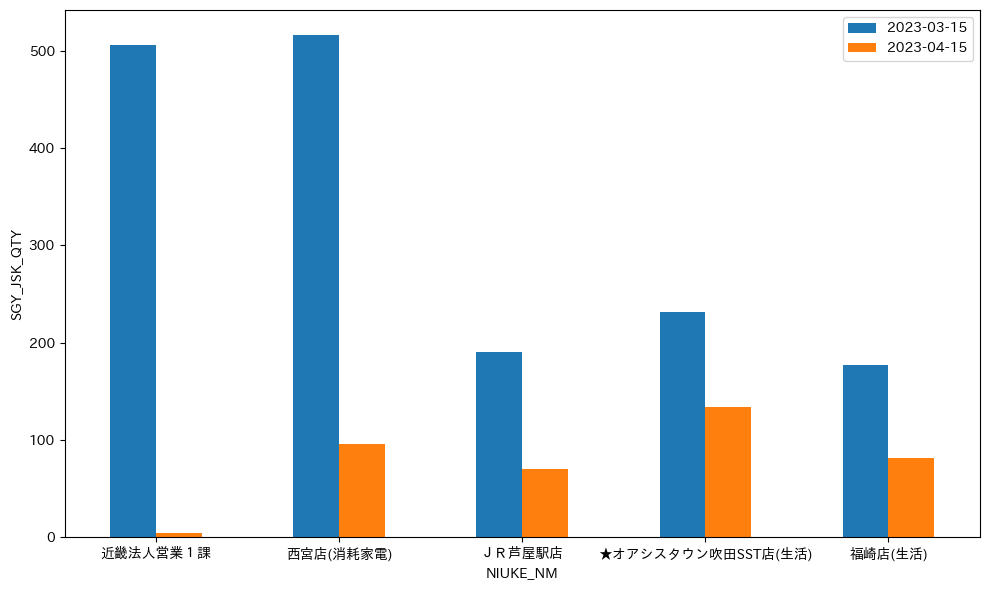

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data for comparison
data = {
    'NIUKE_NM':['近畿法人営業１課', '西宮店(消耗家電)', 'ＪＲ芦屋駅店', '★オアシスタウン吹田SST店(生活)', '福崎店(生活)'],
    '2023-03-15': [506, 516, 190, 231, 177],
    '2023-04-15': [4, 96, 70, 134, 81],
    'CHANGE_AMOUNT': [-502, -420, -120, -97, -96],
    'CHANGE(%)': [-12550.0, -437.5, -171.43, -72.39, -118.52],
}

df = pd.DataFrame(data)

# Set the NIUKE_NM column as index
df.set_index('NIUKE_NM', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df[['2023-03-15', '2023-04-15']].plot(kind='bar', ax=ax)
ax.set_ylabel('SGY_JSK_QTY')
ax.set_xlabel('NIUKE_NM')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


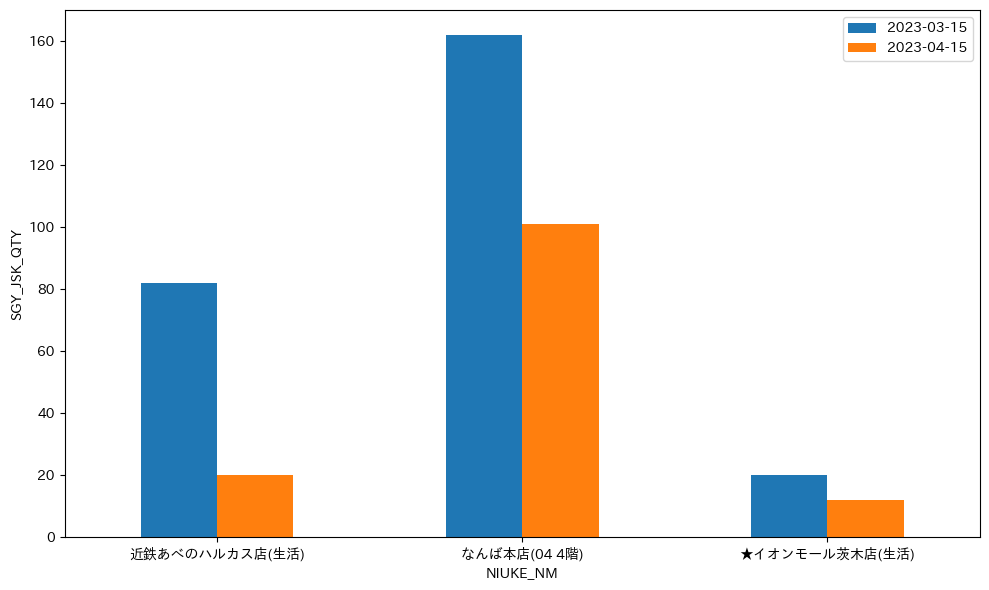

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'NIUKE_NM': ['近鉄あべのハルカス店(生活)', 'なんば本店(04 4階)', '★イオンモール茨木店(生活)'],
    '2023-03-15': [82, 162, 20],
    '2023-04-15': [20, 101, 12],
    'Change Amount': [62, 61, 8],
    'Change Percent': [-310.00, -60.4, -66.67]
}

df = pd.DataFrame(data)

# Set the NIUKE_NM column as index
df.set_index('NIUKE_NM', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df[['2023-03-15', '2023-04-15']].plot(kind='bar', ax=ax)
ax.set_ylabel('SGY_JSK_QTY')
ax.set_xlabel('NIUKE_NM')


plt.xticks(rotation=0)
plt.tight_layout()
plt.show()